### **Solutions 2**

In [1]:
# imports and utilities
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import AerSimulator
import math
from matplotlib import pyplot as plt

#### **Solution 2.1**
- $\begin{bmatrix}0.8\\0.2\end{bmatrix}$ is not a state vector, since $\Bigg\lVert\begin{bmatrix}0.8\\0.2\end{bmatrix}\Bigg\rVert=\sqrt{0.8^2+0.2^2}\neq 1$
- $\lvert -\rangle=\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle$ is state vector, amplitutes are $\frac{1}{\sqrt{2}},-\frac{1}{\sqrt{2}}$, measurement probabilities are $\frac{1}{2}$ for both $\lvert 0\rangle$ and $\lvert 1\rangle$
- $\begin{bmatrix}0\\i\end{bmatrix}$ is state vector, amplitutes are $0,i$, measurement probabilities are $0$ for $\lvert 0\rangle$ and $1$ for $\lvert 1\rangle$
- $\dfrac{e^{i\pi}}{2}\begin{bmatrix}\sqrt{3}\\1\end{bmatrix}$ is state vector, amplitutes are $-\frac{\sqrt{3}}{2},-\frac{1}{2}$, measurement probabilities are $\frac{3}{4}$ for $\lvert 0\rangle$ and $\frac{1}{4}$ for $\lvert 1\rangle$

#### **Solution 2.2**
1. $H^\dagger=H,\,HH^\dagger=H^2=I$, therefore $H$ is unitary
2. $H\bigg(\frac{\sqrt{3}}{2}\lvert 0\rangle+\frac{1}{2}\lvert 1\rangle\bigg)=\dfrac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}\begin{bmatrix}\sqrt{3}/2\\1/2\end{bmatrix}=\dfrac{1}{2\sqrt{2}}\begin{bmatrix}\sqrt{3}+1\\\sqrt{3}-1\end{bmatrix}$
3. Quantum computations are reversible, hence the input state is uniquely determined. It can be obtained by applying the gate's inverse. $H^{-1}\bigg(-\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle\bigg)=H\bigg(-\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle\bigg)=\dfrac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}\begin{bmatrix}-1/\sqrt{2}\\-1/\sqrt{2}\end{bmatrix}=\begin{bmatrix}-1\\0\end{bmatrix}$

#### **Solution 2.3**
1. - $R_y(\theta)\lvert 0\rangle=\begin{bmatrix}\cos(\theta/2)&-\sin(\theta/2)\\\sin(\theta/2)&\cos(\theta/2)\end{bmatrix}\begin{bmatrix}1\\0\end{bmatrix}=\begin{bmatrix}\cos(\theta/2)\\\sin(\theta/2)\end{bmatrix}$
    - $R_y(\theta)\lvert 1\rangle=\begin{bmatrix}\cos(\theta/2)&-\sin(\theta/2)\\\sin(\theta/2)&\cos(\theta/2)\end{bmatrix}\begin{bmatrix}0\\1\end{bmatrix}=\begin{bmatrix}-\sin(\theta/2)\\\cos(\theta/2)\end{bmatrix}$
    - $\Rightarrow R_y(\theta)$ rotates state vectors mathematically positive by angle of $\theta/2$
2. - $H\bigg(\frac{\sqrt{3}}{2}\lvert 0\rangle+\frac{1}{2}\lvert 1\rangle\bigg)=HR_y(\pi/3)\lvert 0\rangle$
    - $H^{-1}\bigg(-\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle\bigg)=H\bigg(-\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle\bigg)=HR_y(5\pi/2)\lvert 0\rangle$

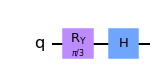

Statevector([0.96592583+0.j, 0.25881905+0.j],
            dims=(2,))


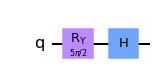

Statevector([-1.00000000e+00+0.j, -2.22044605e-16+0.j],
            dims=(2,))


In [2]:
def rot_hadamard(theta):
    qc = QuantumCircuit(1)
    qc.ry(theta, 0)
    qc.h(0)
    display(qc.draw(output="mpl"))
    display(Statevector(qc))

rot_hadamard(math.pi/3)
rot_hadamard(5*math.pi/2)

#### **Solution 2.4**

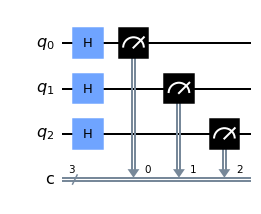

In [3]:
# defining the circuit
register = range(3)
qc = QuantumCircuit(len(register), len(register))
qc.h(register)
qc.measure(register, register)
qc.draw(output="mpl")

(array([176., 182., 179., 174., 143., 170.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

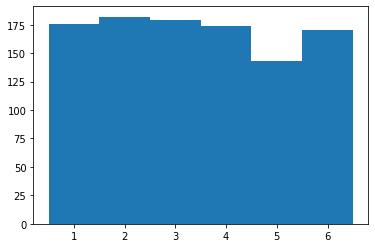

In [4]:
# running the experiment
def coin_toss(sim, qc):
    job = sim.run(qc, shots=1)
    result = job.result()
    counts = result.get_counts()
    bit_word = next(iter(counts.keys()))
    return int(bit_word, 2)

def dice_roll(sim, qc):
    while True:
        result = coin_toss(sim, qc)
        if 0<result and result<7:
            return result
        
def experiment(sim, qc, rolls):
    return map(lambda _: dice_roll(sim, qc), range(rolls))
    
result = experiment(AerSimulator(), qc, 1024)        
plt.hist(list(result), bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])